<a id='table_of_contents'></a>

# Table of Contents
0. [Import Libraries and Data](#imports) 
1. [Data Exploration](#data_exploration)
2. [Helper Functions](#functions)
3. [Data Cleaning](#clean_data)
4. [Netfilx Analysis](#netflix)
5. [Movies vs TV Shows](#comparsion)

<a id='imports'></a>
# Import Libraries and Data
[Back to top](#table_of_contents)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
netflix_df = pd.read_csv("data/netflix_titles.csv")

<a id='data_exploration'></a>
# Data Exploration
[Back to top](#table_of_contents)

In [3]:
netflix_df.shape

(8807, 12)

In [4]:
netflix_df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2962,s2963,TV Show,Miraculous: Tales of Ladybug & Cat Noir,Thomas Astruc,"Cristina Vee, Bryce Papenbrook, Keith Silverst...","France, South Korea, Japan, United States","February 1, 2020",2019,TV-Y7,5 Seasons,"Kids' TV, TV Action & Adventure","When Paris is in peril, Marinette becomes Lady..."
3793,s3794,Movie,Svaha: The Sixth Finger,Jang Jae-hyun,"Lee Jung-jae, Park Jung-min, Lee Jae-in, Yoo J...",South Korea,"May 30, 2019",2019,TV-MA,123 min,"International Movies, Thrillers",A minister who researches religious cults turn...
4328,s4329,Movie,Teefa in Trouble,Ahsan Rahim,"Ali Zafar, Maya Ali, Javed Sheikh, Mehmood Asl...",Pakistan,"December 2, 2018",2018,TV-14,155 min,"Action & Adventure, Comedies, International Mo...",A gangster hires goon Teefa to abduct his frie...
2796,s2797,Movie,Ultras,Francesco Lettieri,"Aniello Arena, Antonia Truppo, Ciro Nacca, Sim...",Italy,"March 20, 2020",2020,TV-MA,109 min,"Dramas, International Movies, Sports Movies",An aging soccer fanatic faces down the reality...
5545,s5546,Movie,Elaan,K. Ramanlal,"Vinod Mehra, Rekha, Vinod Khanna, Helen, Madan...",India,"April 1, 2017",1971,TV-14,143 min,"Action & Adventure, Cult Movies, International...",Journalist Naresh is hired to probe illegal ac...


In [5]:
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
netflix_df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [7]:
netflix_df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


<a id='functions'></a>
# Helper Functions
[Back to top](#table_of_contents)

In [8]:
def split_and_count(df,name,value):
    result = df[name].str.lower().str.split(', ').explode().str.strip().value_counts().head(value)
    return result

In [9]:
def add_plot_labels(title,xlable,ylable,legend,grid):
    plt.title(title,fontsize=14, fontweight='bold')
    plt.xlabel(xlable, fontsize=12)
    plt.ylabel(ylable, fontsize=12)
    plt.legend(title=legend)
    if grid:
        plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

In [10]:
def plot_bar_chart(x_size,y_size,df,p,title,xlable,ylable):
    plt.figure(figsize=(x_size, y_size))
    sns.barplot(x=df.index, y=df.values, palette=p)
    plt.title(title)
    plt.xlabel(xlable)
    plt.ylabel(ylable)
    plt.show()

In [11]:
def compare_two_bar_charts(x1,y1,x2,y2,p1,p2,movie_title,tv_show_title):
    fig , ax = plt.subplots(1,2,figsize=(15,5))
    sns.barplot(x=x1,y=y1,ax=ax[0],palette=p1)
    ax[0].set_title(movie_title)
    sns.barplot(x=x2,y=y2,ax=ax[1],palette=p2)
    ax[1].set_title(tv_show_title)
    plt.tight_layout()
    plt.show()

<a id='clean_data'></a>
# Data Cleaning
[Back to top](#table_of_contents)

In [12]:
netflix_df = netflix_df.dropna(subset=['duration'])
movie_mask = netflix_df['type'] == 'Movie'

netflix_df.loc[movie_mask, 'duration'] = (
    netflix_df.loc[movie_mask, 'duration']
    .astype(str)
    .str.extract('(\d+)')[0] 
)

netflix_df.loc[movie_mask, 'duration'] = pd.to_numeric(netflix_df.loc[movie_mask, 'duration'], errors='coerce')

tv_shows = netflix_df[netflix_df["type"]=="TV Show"].copy()
movies = netflix_df[netflix_df["type"]=="Movie"] .copy()

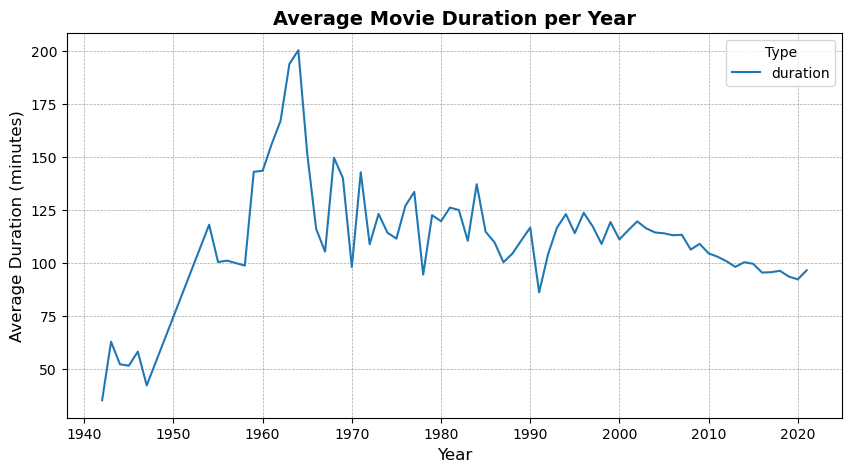

In [13]:
avg_duration_per_year = movies.groupby('release_year')['duration'].mean().sort_index()
plt.figure(figsize=(10, 5))
avg_duration_per_year.plot()
add_plot_labels('Average Movie Duration per Year','Year','Average Duration (minutes)','Type',True)
plt.show()

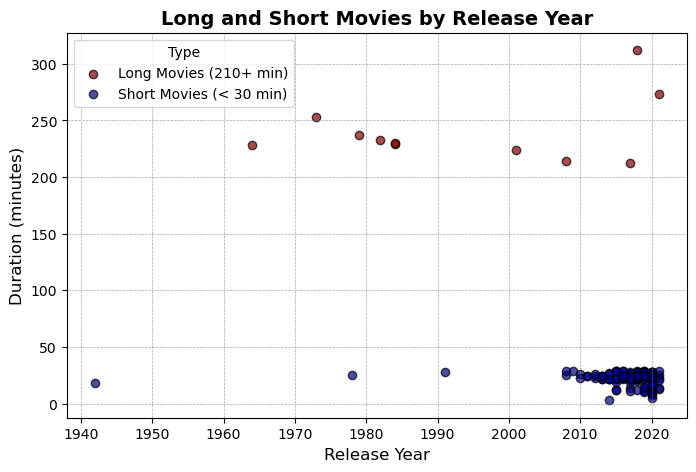

In [14]:
long_movies = movies[movies['duration'] >= 210]
short_movies = movies[movies['duration'] < 30] 

plt.figure(figsize=(8, 5))

plt.scatter(long_movies['release_year'], long_movies['duration'], 
            color='darkred', alpha=0.7, edgecolor='black', label='Long Movies (210+ min)')

plt.scatter(short_movies['release_year'], short_movies['duration'], 
            color='darkblue', alpha=0.7, edgecolor='black', label='Short Movies (< 30 min)')  

add_plot_labels('Long and Short Movies by Release Year','Release Year','Duration (minutes)','Type',True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [15]:
longest_movie = long_movies[long_movies['duration'] > 300]
longest_movie 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4253,s4254,Movie,Black Mirror: Bandersnatch,NaN,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,"December 28, 2018",2018,TV-MA,312,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question..."


In [16]:
numeric_mask = pd.to_numeric(netflix_df.loc[movie_mask, 'duration'], errors='coerce')

netflix_df.loc[movie_mask & (numeric_mask > 300), 'duration'] = 90
netflix_df.loc[movie_mask & (numeric_mask < 30), 'type'] = "Short Movie"

movies = netflix_df[netflix_df["type"] == "Movie"].copy()
short_movies = netflix_df[netflix_df["type"] == "Short Movie"].copy()

<a id='netflix'></a>
# Netflix Analysis
[Back to top](#table_of_contents)

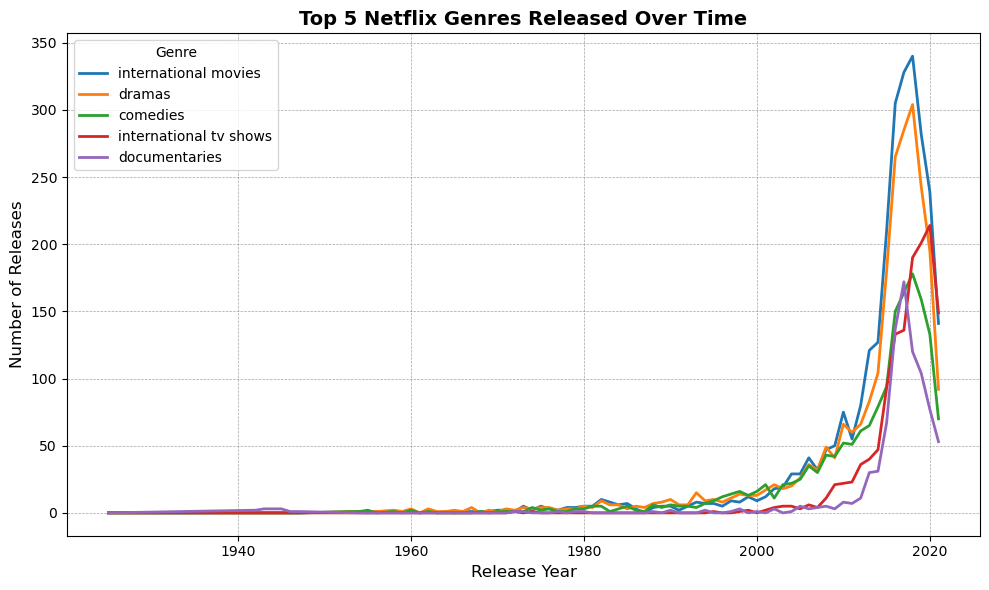

In [17]:
genre_year_df = netflix_df[['release_year', 'listed_in']].copy()
genre_year_df = genre_year_df.assign(
    genre=genre_year_df['listed_in'].str.split(',')
).explode('genre')


genre_year_df['genre'] = genre_year_df['genre'].str.strip().str.lower()
genre_counts = genre_year_df.groupby(['release_year', 'genre']).size().unstack(fill_value=0)
top_genres = genre_counts.sum().sort_values(ascending=False).head(5)

genre_counts[top_genres.index].plot(figsize=(10, 6), linewidth=2)
add_plot_labels("Top 5 Netflix Genres Released Over Time","Release Year","Number of Releases","Genre",True)
plt.tight_layout()
plt.show()

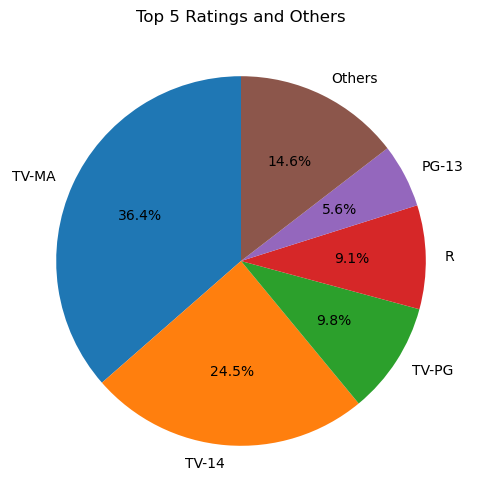

In [18]:
top_5_ratings = netflix_df['rating'].value_counts().head(5)
others_count = netflix_df['rating'].value_counts().sum() - top_5_ratings.sum()
top_5_ratings_with_others = pd.concat([top_5_ratings, pd.Series({'Others': others_count})])
plt.figure(figsize=(10, 6))
plt.pie(top_5_ratings_with_others, labels=top_5_ratings_with_others.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Ratings and Others')
plt.show()

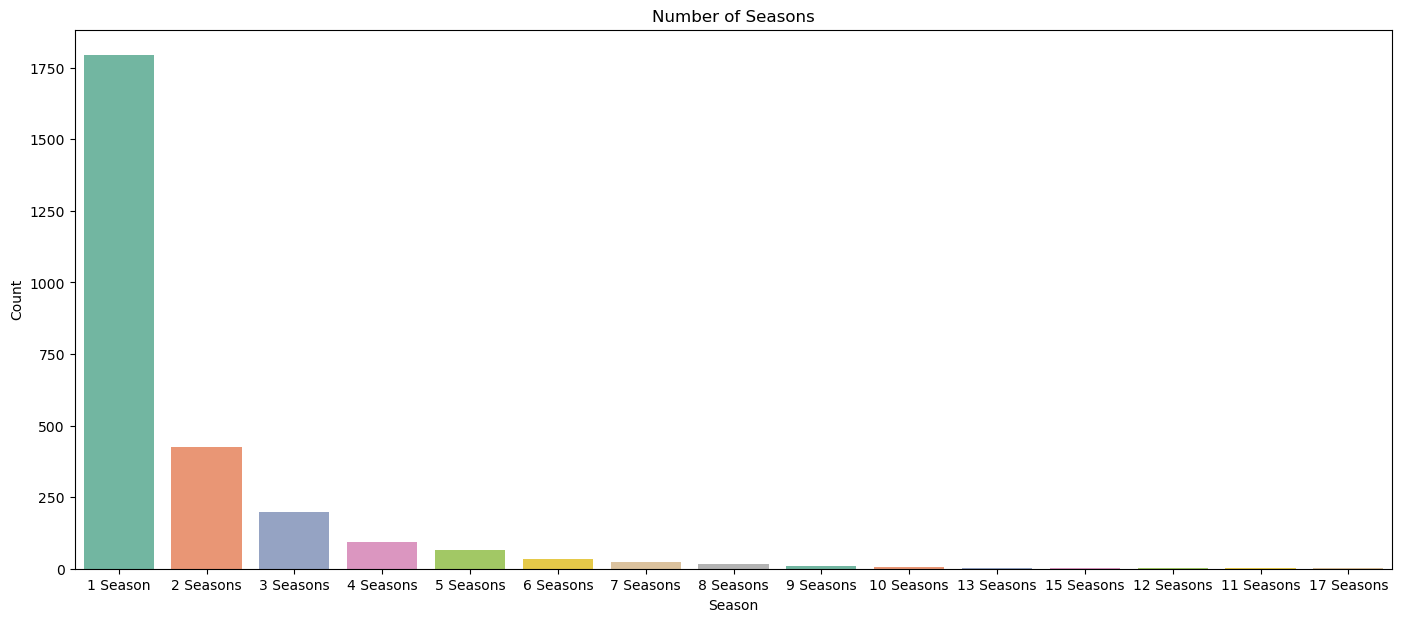

In [19]:
tv_show_seasons = tv_shows['duration'].value_counts()
plot_bar_chart(17,7,tv_show_seasons,'Set2','Number of Seasons','Season','Count')

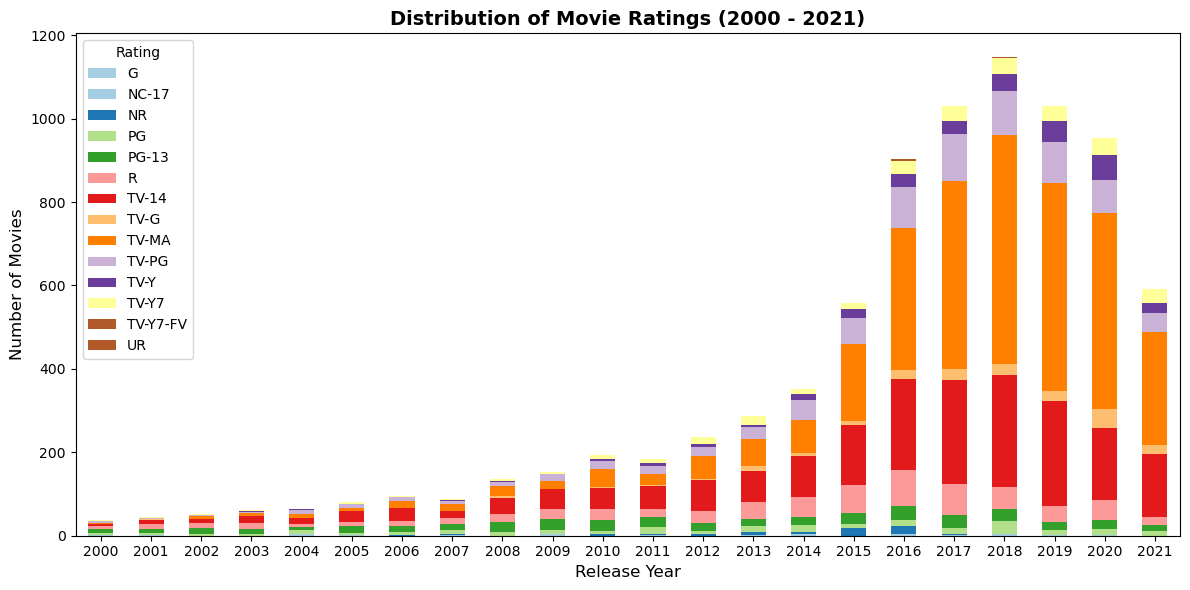

In [20]:
rating_per_year = netflix_df.groupby('release_year')['rating'].value_counts().unstack(fill_value=0)
rating_per_year = rating_per_year[rating_per_year.index > 1999]
rating_per_year.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Paired')
add_plot_labels('Distribution of Movie Ratings (2000 - 2021)','Release Year','Number of Movies','Rating',False)
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

<a id='comparsion'></a>
# Movies vs TV Shows
[Back to top](#table_of_contents)

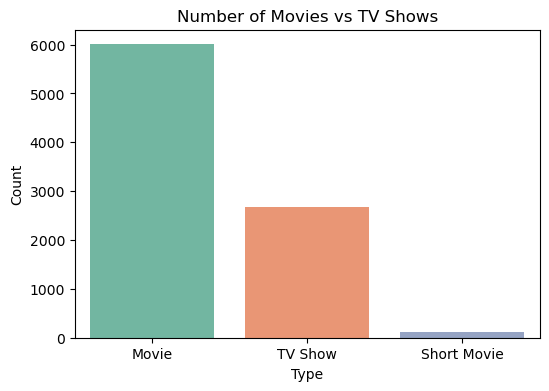

In [21]:
type_counts = netflix_df['type'].value_counts()
plot_bar_chart(6,4,type_counts,'Set2','Number of Movies vs TV Shows','Type','Count')

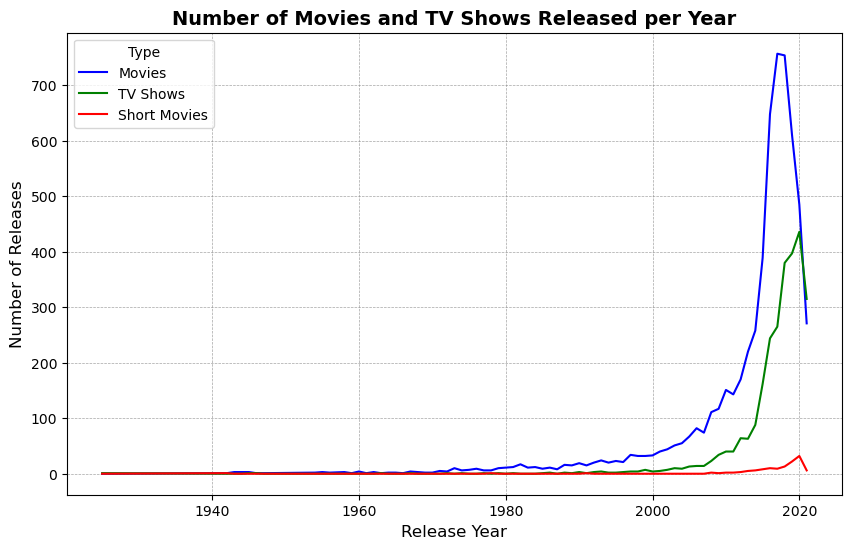

In [22]:
content_counts = netflix_df.groupby(['release_year', 'type']).size().unstack(fill_value=0)
plt.figure(figsize=(10, 6))
plt.plot(content_counts.index, content_counts['Movie'], linestyle='-', color='blue', label='Movies')
plt.plot(content_counts.index, content_counts['TV Show'], linestyle='-', color='green', label='TV Shows')
plt.plot(content_counts.index, content_counts['Short Movie'], linestyle='-', color='red', label='Short Movies')
add_plot_labels('Number of Movies and TV Shows Released per Year','Release Year','Number of Releases',"Type",True)
plt.show()

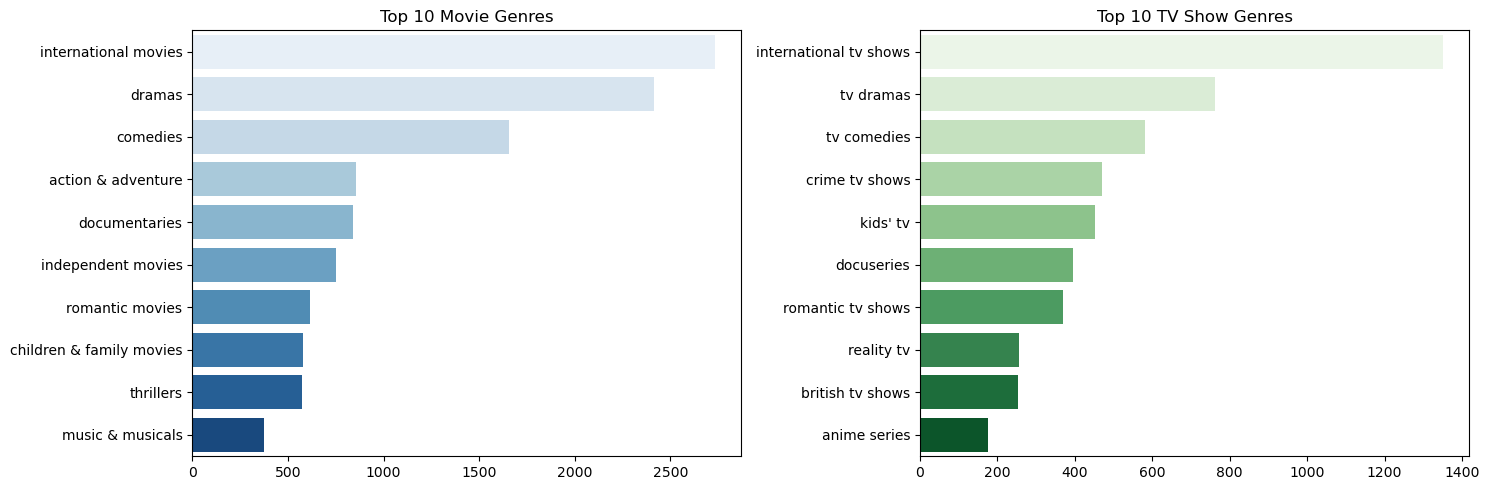

In [23]:
movie_genres = split_and_count(movies,'listed_in',10)
tv_show_genres = split_and_count(tv_shows,'listed_in',10)
compare_two_bar_charts(movie_genres.values,movie_genres.index,tv_show_genres.values,tv_show_genres.index,
       'Blues','Greens','Top 10 Movie Genres','Top 10 TV Show Genres')

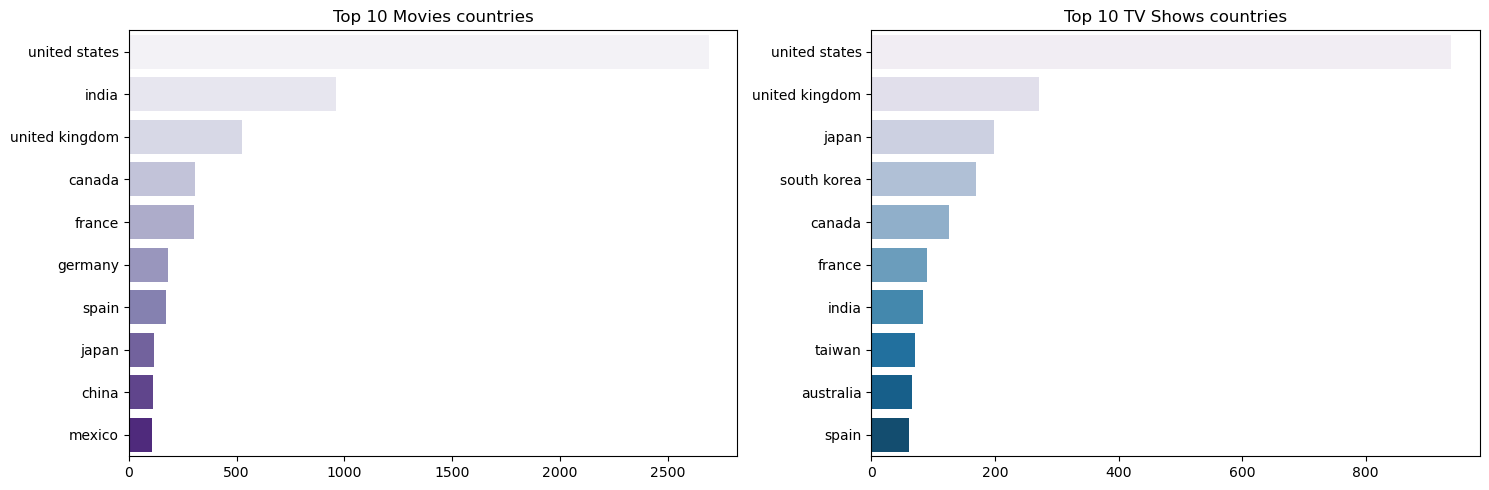

In [24]:
movie_countries = split_and_count(movies,'country',10)
tv_show_countries = split_and_count(tv_shows,'country',10)
compare_two_bar_charts(movie_countries.values,movie_countries.index,tv_show_countries.values,tv_show_countries.index,
       'Purples','PuBu','Top 10 Movies countries','Top 10 TV Shows countries')

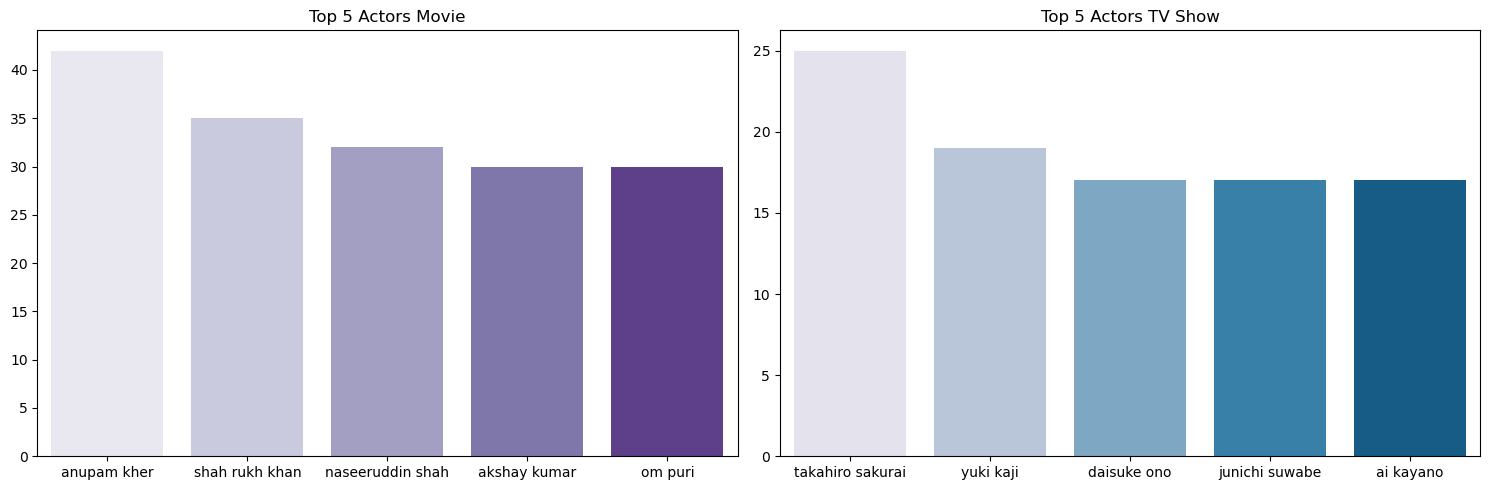

In [25]:
movie_actors = split_and_count(movies,'cast',5)
tv_show_actors = split_and_count(tv_shows,'cast',5)
compare_two_bar_charts(movie_actors.index,movie_actors.values,tv_show_actors.index,tv_show_actors.values,
       'Purples','PuBu','Top 5 Actors Movie','Top 5 Actors TV Show')